# Agent Based Staircase Model

## This notebook implements an agent-based approach to modeling the travel of people up and down a staircase simultaneously. 

Each agent has the following characteristics:
- Age (years)
- Sex (M/F)
- Height (cm)
- Weight (kg)
- Group
- Stepping Pattern (traditional: one footstep per stair, double: two footsteps per stair, skip: only step on every other stair)
    - Sampled from a distribution dependent on the age, height, and weight of the agent
- Intended Final Destination
- Desired Velocity $v$ (m/s)
- Ascending/Descending

The following parameters are used to define the staircase domain:
- The number of stairs $N$
- The length of each step ${l}_{i = 1}^N $
- The width of each step ${w}_{i=1}^N $

It is assumed that the steps are continuous in that the length of the far edge must align with the length of the close edge of the next step and vice versa.

Groups arrive at the staircase according to a Poisson Arrival Process. When a group arrives, the size of the group is sampled from a distribution and each of the members of the group are introduced into the model. 

The initial locations of the agents within the staircase are found by first introducing them in a horizonal arrangement (i.e. shoulder-to-shoulder) in an open space before the staircase subject to the same attracion and repulsions which govern movement within the staircase. This open space then narrows to match the dimensions of the fist stair, serving as a funnel. This enables the groups to form an inital arrangement on the staircase which resembles a natural group walking formation.

Attractive Forces:
- Desire to reach intended destination atop the staircase by following a linear trajectory (most efficient route between points a and b is a straight line)
- Desire to maintain intended velocity
- Desire to maintain a certain distance between group members
- Desire to obey agreed upon social convention (walking on the right side vs left side)

Repulsive Forces:
- Desire not to get too close to other people 
    - the strength of this desire depends on whether the other agent is a member of one's group and the direction in which they are traversing (e.g. One would have a stronger desire to avoid contact with someone going in the opposite direction)

These attractive and repulsive forces are then combined into a utility function which determines where the agent will step on the next stair in the $x$ dimension (along the width of the stair). 

The final output of this model is a dataset of simulated steps on each stair and their associated agent. These steps can easily be converted to represent the cumulative pressure placed on each stair over the time interval in which the simulation is run. With a long enough sample, we can then extrapolate to a larger time interval by assuming periodicity in the stepping patterns. 


In [3]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# Group Initialization
 - A Poisson Arrival Process dictates when the groups arrive ($\lambda$ is a model parameter)
 - Group size is sample from a right-skewed distribution (this can be varried as a model parameter)
 - Agents are then instantiated by placing the group in a horizontal formation inside the funnel either at the top or bottom of the staircase

In [ ]:
def generate_poisson_arrivals(rate, duration):
    # Simulates a Poisson arrival process, returning a set of group arrival times
    arrivals = []
    current_time = 0

    while current_time < duration:
        # Generate interarrival time
        interarrival_time = np.random.exponential(1 / rate)
        current_time += interarrival_time
        if current_time < duration:
            arrivals.append(current_time)

    return arrivals


In [ ]:
class Group:
    def __init__(self, model, group_id, domain_width, domain_height):
        """
        Initialize a Group.

        Parameters:
        - model: The model to which the group belongs.
        - group_id: Unique identifier for the group.
        - domain_width: Width of the domain (for horizontal spacing).
        - domain_height: Height of the domain (for vertical positioning).
        """
        self.group_id = group_id
        self.model = model
        self.domain_width = domain_width
        self.domain_height = domain_height

        # Sample group size from a right-skewed distribution (e.g., exponential distribution)
        self.group_size = max(1, int(np.random.exponential(scale=1.5)))  # Ensures at least 1 agent
        self.agents = []

        # Horizontal spacing for agents
        horizontal_spacing = domain_width / (self.group_size + 1)

        # Instantiate agents
        for i in range(self.group_size):
            unique_id = f"Group{group_id}_Agent{i}"
            x_position = (i + 1) * horizontal_spacing
            y_position = 0  # Bottom of the domain

            # Sample attributes for the agent
            age = np.random.randint(10, 70)  # Example age distribution
            sex = np.random.choice(["M", "F"])
            height = np.random.normal(170, 10)
            weight = np.random.normal(70, 15)
            stepping_pattern = np.random.choice(["traditional", "double", "skip"])
            velocity = np.random.uniform(0.5, 1.5)
            direction = np.random.choice(["ascending", "descending"])

            # Create an Agent and set its initial position
            agent = Agent(unique_id, age, sex, height, weight, stepping_pattern, velocity, direction, group_id)
            agent.position = (x_position, y_position)

            self.agents.append(agent)


## Agent Class

In [ ]:
class Agent:
    def __init__(self, unique_id, age, sex, height, weight, stepping_pattern, velocity, direction, group_id):
        self.unique_id = unique_id
        self.age = age
        self.sex = sex
        self.height = height
        self.weight = weight
        self.stepping_pattern = stepping_pattern
        self.velocity = velocity
        self.direction = direction
        self.group_id = group_id
        self.position = 

    def step(self):
        # Compute forces and update position
        forces = self.calculate_forces()
        self.position = self.update_position(forces)
    
    def calculate_forces(self):
        # Calculate attractive and repulsive forces
        # Example: destination force, velocity maintenance
        return force 

    def update_position(self, forces):
        # Update position based on forces
        new_x = self.position[0] + forces["x_force"]
        new_y = self.position[1] + forces["y_force"]
        return (new_x, new_y)
    
        

## Domain

Create the staircase domain

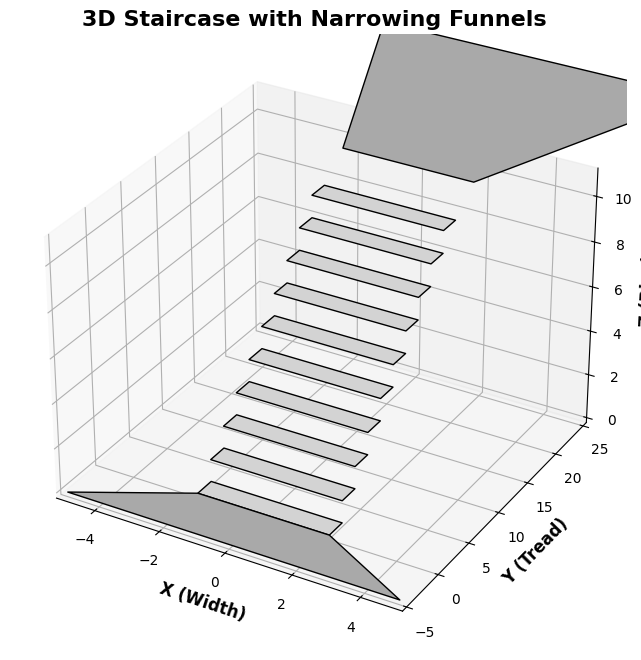

In [9]:
class StaircaseWithFunnelsAligned:
    def __init__(self, step_count, step_width, step_depth, step_height, funnel_length, funnel_width_start):
        """
        Create a staircase domain with narrowing funnels at both ends.

        Parameters:
        - step_count: Number of steps in the staircase.
        - step_width: Width of each step.
        - step_depth: Depth of each step.
        - step_height: Height of each step.
        - funnel_length: Length of the funnels (y-dimension).
        - funnel_width_start: Initial width of the funnels (widest part).
        """
        self.step_count = step_count
        self.step_width = step_width
        self.step_depth = step_depth
        self.step_height = step_height
        self.funnel_length = funnel_length
        self.funnel_width_start = funnel_width_start
        self.step_width_end = step_width

    def draw(self):
        """
        Visualize the staircase domain with 3D funnels.
        """
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')

        # Draw bottom funnel
        self._draw_funnel(ax, 0, self.funnel_width_start, self.step_width_end, -self.funnel_length, False)

        # Draw staircase
        for i in range(self.step_count):
            z = i * self.step_height
            x_start = -self.step_width_end / 2  # Align edges of the steps in X
            y_offset = i * self.step_depth
            self._draw_step(ax, z, x_start, y_offset)

        # Draw top funnel
        top_funnel_z = self.step_count * self.step_height
        self._draw_funnel(ax, top_funnel_z, self.funnel_width_start, self.step_width_end, self.funnel_length + y_offset, True)

        # Set axis limits and labels
        ax.set_xlim(-self.funnel_width_start / 2, self.funnel_width_start / 2)
        ax.set_ylim(-self.funnel_length, self.funnel_length + self.step_count * self.step_depth)
        ax.set_zlim(0, self.step_count * self.step_height + self.step_height)
        ax.set_xlabel("X (Width)", fontsize=12, fontweight="bold")
        ax.set_ylabel("Y (Tread)", fontsize=12, fontweight="bold")
        ax.set_zlabel("Z (Rise)", fontsize=12, fontweight="bold")
        ax.set_title("3D Staircase with Narrowing Funnels ", fontsize=16, fontweight="bold")
        plt.show()

    def _draw_step(self, ax, z, x_start, y_offset):
        """
        Draw a single step in the staircase.
        """
        x = np.array([
            x_start, x_start + self.step_width_end,
            x_start + self.step_width_end, x_start
        ])
        y = np.array([
            y_offset, y_offset,
            y_offset + self.step_depth, y_offset + self.step_depth
        ])
        z = np.array([z, z, z, z])
        vertices = [list(zip(x, y, z))]
        ax.add_collection3d(Poly3DCollection(vertices, facecolors='lightgray', edgecolors='black'))


    def _draw_funnel(self, ax, z_start, funnel_width_start, step_width_end, y_end, top):
        """
        Draw a narrowing funnel (trapezoidal) in 3D.
        If `top` is True, shift the funnel in the y-direction by its length.
        """
        x = np.array([
            -funnel_width_start / 2, funnel_width_start / 2,  # Wide base
            step_width_end / 2, -step_width_end / 2          # Narrow base
        ])
        y = np.array([y_end, y_end, 0, 0])  # Flip funnel in Y
        z = np.array([z_start, z_start, z_start, z_start])
        
        if top:
            y += y_end  # Shift all y-values by the length of the funnel

        vertices = [list(zip(x, y, z))]
        ax.add_collection3d(Poly3DCollection(vertices, facecolors='darkgray', edgecolors='black'))

        


# Example usage
staircase_with_funnels_aligned = StaircaseWithFunnelsAligned(
    step_count=10,        # Number of steps
    step_width=4,         # Width of each step
    step_depth=2,         # Depth of each step
    step_height=1,        # Height of each step
    funnel_length=5,      # Length of the funnels
    funnel_width_start=10 # Initial width of the funnels
)

staircase_with_funnels_aligned.draw()


## Model (I think this is not necessary)

In [ ]:
# Define the Model
class StaircaseModel:
    def __init__(self, num_agents, num_stairs, stair_length, stair_width):
        self.num_agents = num_agents
        self.num_stairs = num_stairs
        self.stair_length = stair_length
        self.stair_width = stair_width
        self.space = ContinuousSpace(stair_length, stair_width, True)

        # Initialize agents
        for i in range(num_agents):
            age = np.random.randint(10, 70)  # Example age distribution
            sex = np.random.choice(["M", "F"])
            height = np.random.normal(170, 10)
            weight = np.random.normal(70, 15)
            stepping_pattern = np.random.choice(["traditional", "double", "skip"])
            velocity = np.random.uniform(0.5, 1.5)
            direction = np.random.choice(["ascending", "descending"])
            group_id = np.random.randint(0, 10)
            agent = Agent(i, age, sex, height, weight, stepping_pattern, velocity, direction, group_id)
            self.schedule.add(agent)
            agent.position = self.space.place_agent(agent, (0, i * 2))  # Example initialization

    def step(self):
        self.schedule.step()

# Run the model
model = StaircaseModel(num_agents=100, num_stairs=10, stair_length=1.0, stair_width=1.0)
for i in range(100):
    model.step()


# Utility Function 

In [ ]:
# calculates the utility of the next step an agent takes looking at the agents' attributes and the attributes of surrounding agents 
def utility_function(agent, agents, staircase):
    # Example attractive forces
    destination_force = np.linalg.norm(agent.position - agent.destination)
    velocity_force = abs(agent.desired_velocity - agent.current_velocity)

    # Example repulsive forces
    repulsion = 0
    for other_agent in agents:
        if other_agent != agent:
            distance = np.linalg.norm(agent.position - other_agent.position)
            repulsion += 1 / distance  # Stronger repulsion at smaller distances

    # Combine forces into utility
    utility = -destination_force - velocity_force + repulsion
    return utility



def sample_from_utility_distribution(agent, model_agents):

# Simulation

In [ ]:
def simulate(lambda_rate, simulation_duration): # add more necessary parameters

    # Generate Group Arrival Times

    lambda_rate = 0.1  # Mean arrival rate: 0. 1 arrivals per unit time (seconds)
    simulation_duration = 100000  # Simulate for 10000 time units

    arrival_times = generate_poisson_arrivals(lambda_rate, simulation_duration)

    # Time Loop - Iterate through the time steps

        # Introduce groups according to the arrival times

        # Keep Track of Agents in the Model
    
        # Update the positon of Each Agent by Sampling the Utility Function
    
            # If Agent is no longer on staircase i.e. in opposite funnel, it no longer needs to be tracked
    
        # Track the Foot Placement of Each Agent
    
    


    



In [ ]:
class Agent:
    def __init__(self, agent_id, group_id, position, velocity, destination):
        self.agent_id = agent_id
        self.group_id = group_id
        self.position = np.array(position)  # [x, y, stair]
        self.velocity = velocity
        self.destination = destination
        self.active = True

    def update_position(self, utility_function, agents, staircase):
        utilities = utility_function(self, agents, staircase)
        probabilities = np.exp(utilities) / np.sum(np.exp(utilities))  # Softmax
        next_step = np.random.choice(len(utilities), p=probabilities)
        self.position = next_step
        if self.position[2] >= staircase.num_stairs or self.position[2] < 0:
            self.active = False  # Agent has exited the staircase

class Simulation:
    def __init__(self, staircase_params, lambda_rate, simulation_duration):
        self.staircase = Staircase(**staircase_params)
        self.lambda_rate = lambda_rate
        self.simulation_duration = simulation_duration
        self.time = 0
        self.agents = []
        self.arrival_times = self.generate_poisson_arrivals(lambda_rate, simulation_duration)

    @staticmethod
    def generate_poisson_arrivals(lambda_rate, duration):
        return np.cumsum(np.random.exponential(1 / lambda_rate, int(lambda_rate * duration * 2)))

    def initialize_group(self, group_id):
        group_size = np.random.poisson(3) + 1  # Example: mean group size is 3
        agents = []
        for i in range(group_size):
            position = [np.random.randint(0, self.staircase.width), 0, 0]  # Starting at the bottom of the staircase
            velocity = np.random.uniform(0.5, 1.5)  # Random velocity
            destination = [np.random.randint(0, self.staircase.width), 0, self.staircase.num_stairs]
            agents.append(Agent(agent_id=len(self.agents) + i, group_id=group_id, position=position, velocity=velocity, destination=destination))
        return agents

    def simulate(self):
        group_id = 0
        while self.time < self.simulation_duration:
            # Introduce groups according to the arrival times
            if len(self.arrival_times) > 0 and self.time >= self.arrival_times[0]:
                self.arrival_times = self.arrival_times[1:]  # Remove the first arrival time
                group = self.initialize_group(group_id)
                self.agents.extend(group)
                group_id += 1

            # Update agents
            active_agents = []
            for agent in self.agents:
                if agent.active:
                    agent.update_position(self.utility_function, self.agents, self.staircase)
                    self.staircase.record_footstep(agent.position[2], agent.position[0], agent.position[1])
                    if agent.active:  # Still active after update
                        active_agents.append(agent)
            self.agents = active_agents

            self.time += 1

    @staticmethod
    def utility_function(agent, agents, staircase):
        # Simplified utility function
        destination_force = -np.linalg.norm(agent.position - agent.destination)
        repulsion = 0
        for other_agent in agents:
            if other_agent != agent:
                distance = np.linalg.norm(agent.position - other_agent.position)
                if distance < 1.0:
                    repulsion += 1 / distance
        return [destination_force + repulsion]  # Simplified example with one utility value